Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27307 entries, 0 to 27306
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              27307 non-null  int64  
 1   Institution            27306 non-null  object 
 2   Country                27307 non-null  object 
 3   Author                 27307 non-null  object 
 4   ArticleType            27307 non-null  object 
 5   RetractionDate         27307 non-null  object 
 6   RetractionPubMedID     25522 non-null  float64
 7   OriginalPaperDate      27306 non-null  object 
 8   OriginalPaperPubMedID  25528 non-null  float64
 9   RetractionNature       27306 non-null  object 
 10  Reason                 27306 non-null  object 
 11  Paywalled              27304 non-null  object 
 12  CitationCount          27306 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.7+ MB
None
          Record ID  Retracti

<ipython-input-42-b8e678b42f04>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
<ipython-input-42-b8e678b42f04>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
<ipython-input-42-b8e678b42f04>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

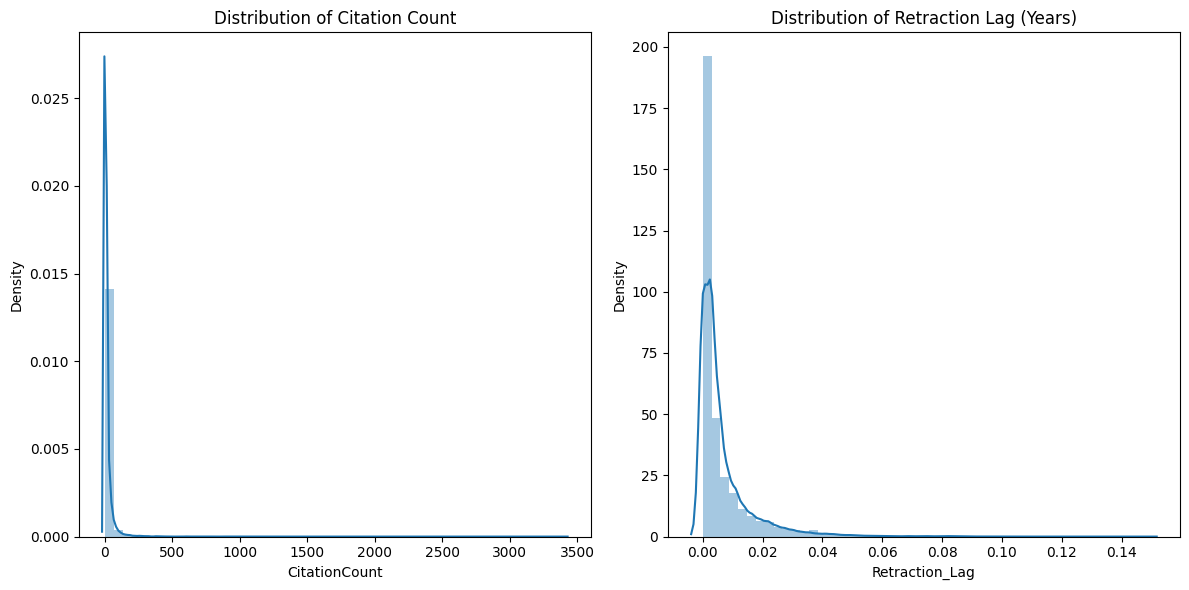

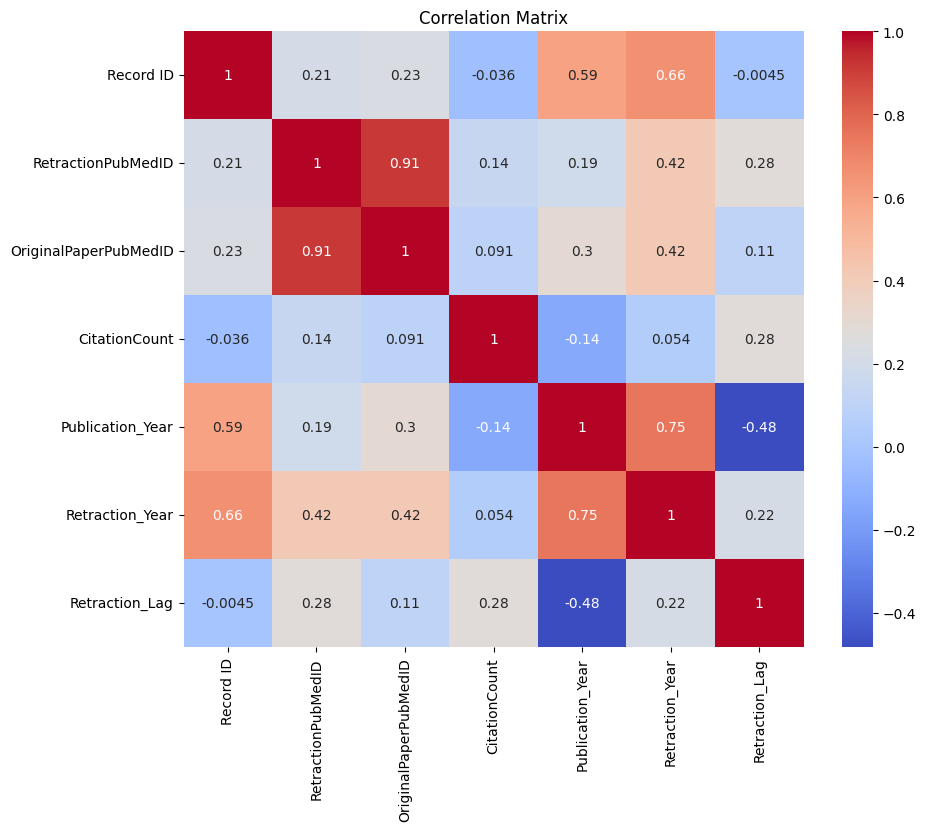

Model Coefficients: [-6.27492003e-02  1.55298806e+03]
Model Intercept: 130.54294597783817
Mean Squared Error: 1488.3037052859822
R-squared: 0.11222744049018163
       Record ID                                        Institution  \
0          50792  Department of Mathematical Sciences, College o...   
1          50782  Department of Physics, Faculty of Science, Cai...   
2          50781  Egypt Nanotechnology Center ((EGNC)), Cairo Un...   
3          50731  School of Computing Science and Engineering, V...   
4          50727  Department of Mechanical Engineering, Aarupada...   
...          ...                                                ...   
27300      10048  School of Economics and Management, Beihang Un...   
27301      10047  School of Finance, Shandong University of Fina...   
27303      10045  School of Management Wuhan University of Techn...   
27304      10044  Department of Accounting, Chung Yuan Christian...   
27305      10043  School of Economy and Trade of Hunan Univ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)
# Exploratory Data Analysis
print("Data Overview:")
#print(retractions.head())
print(retractions.info())
print(retractions.describe())

# Handling missing values (Droping Null Rows)
retractions = retractions.dropna()

# Feature Engineering
# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = retractions['Retraction_Year'] - retractions['Publication_Year']
retractions['Retraction_Lag'] = retractions['Retraction_Lag'] / 365.25



# Distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(retractions['CitationCount'])
plt.title('Distribution of Citation Count')

plt.subplot(1, 2, 2)
sns.distplot(retractions['Retraction_Lag'])
plt.title('Distribution of Retraction Lag (Years)')
plt.tight_layout()
plt.show()

# Correlation matrix
numeric_cols = retractions.select_dtypes(include=[np.number]).columns
corr = retractions[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear Regression Model
target = 'CitationCount'
predictors = ['Publication_Year', 'Retraction_Lag']

X = retractions[predictors]
y = retractions[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print(retractions)



** Without PCA and standardization**

In [ ]:
x=315
y=450
z=(x*3)+450
print(z)

1395


       CitationCount  Retraction_Lag  ArticleType
0                5.0        0.002738           49
1                2.0        0.008214           49
2               14.0        0.010951           49
3                0.0        0.000000            9
4                2.0        0.002738           49
...              ...             ...          ...
27300            0.0        0.000000           27
27301            0.0        0.000000           27
27303            0.0        0.000000           27
27304            0.0        0.000000           27
27305            0.0        0.000000           27

[25517 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters = 0.8540680225696335
Inertia: 16870145.419757806


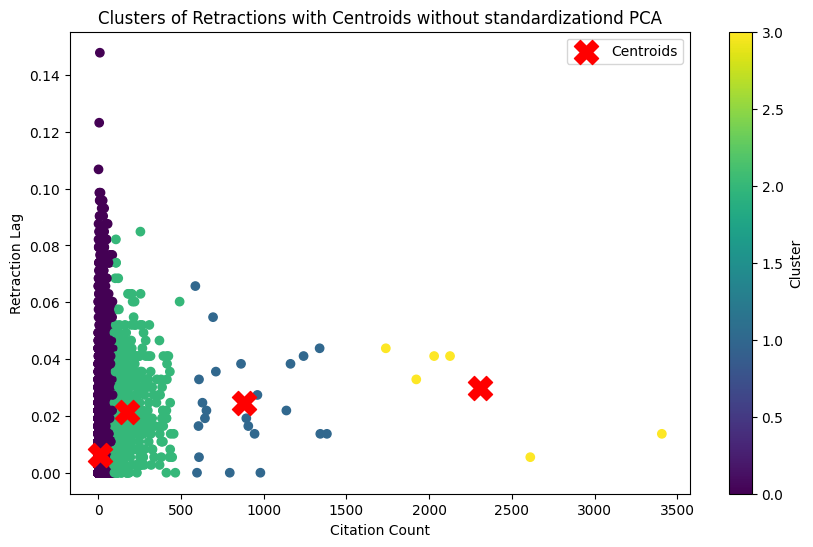

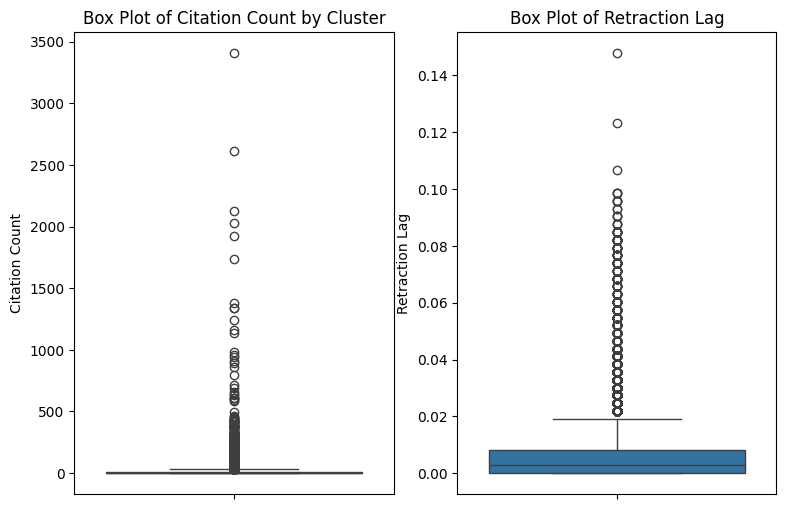

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
retractions
# Assuming 'retractions' DataFrame is already loaded

# Select relevant features for clustering
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

# Encode categorical features
le = LabelEncoder()
retractions['ArticleType'] = le.fit_transform(retractions['ArticleType'])

# Select features for clustering
X = retractions[features]
print(retractions[features])
# Number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
retractions['Cluster'] = kmeans.fit_predict(X)
label=kmeans.labels_
centroid= kmeans.cluster_centers_
# for i in range(3, 10):  # Range adjusted to include up to 10 clusters
#     kmeans = KMeans(n_clusters=i, random_state=0, n_init=2).fit(X)
#     label = kmeans.labels_

print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X, label)}")
inertia = kmeans.inertia_
print("Inertia:", inertia)


# Plot the clusters and centroids
plt.figure(figsize=(10, 6))
scatter = plt.scatter(retractions['CitationCount'], retractions['Retraction_Lag'], c=retractions['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Clusters of Retractions with Centroids without standardizationd PCA')
plt.xlabel('Citation Count')
plt.ylabel('Retraction Lag')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()

# Create box plots for each feature grouped by clusters
plt.figure(figsize=(14, 6))

# Box plot for CitationCount
plt.subplot(1, 3, 1)
sns.boxplot(y='CitationCount', data=retractions)
plt.title('Box Plot of Citation Count by Cluster')
plt.ylabel('Citation Count')

# Box plot for Retraction Lag
plt.subplot(1, 3, 2)
sns.boxplot(y='Retraction_Lag', data=retractions)
plt.title('Box Plot of Retraction Lag')
plt.ylabel('Retraction Lag')
plt.show()


plt.tight_layout()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Removing Outliers and PCA

<ipython-input-69-2861612e3764>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-69-2861612e3764>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['C

Silhouette score for 4 clusters = 0.7242533784125071
Inertia: 177202.07481002843


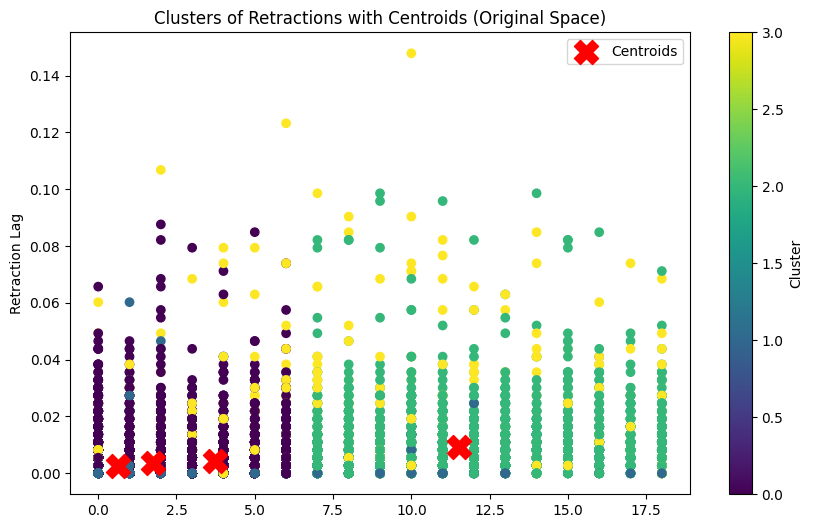

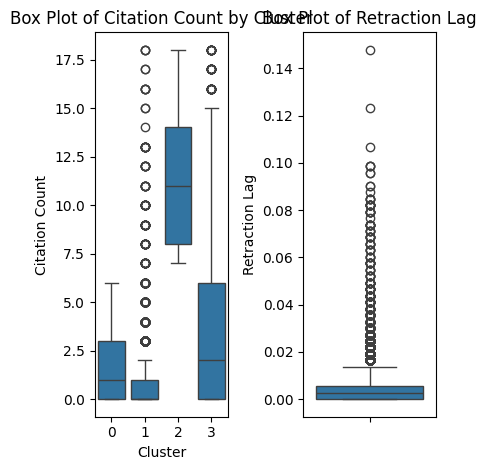

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'retractions' DataFrame is already loaded
retractions
# Filter data
retractions_filtered = retractions[(retractions['CitationCount'] <= 18) & (retractions['Retraction_Lag'] <= 10)]

if len(retractions_filtered) > 0:
    # Select relevant features for clustering
    features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

    # Encode categorical features
    le = LabelEncoder()
    retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])

    # Select features for clustering
    X = retractions_filtered[features]

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X)

    # Number of clusters
    n_clusters = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    retractions_filtered['Cluster'] = kmeans.fit_predict(X_pca)
    label = kmeans.labels_

    # Print the silhouette score for the chosen number of clusters
    print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X_pca, label)}")
    inertia = kmeans.inertia_
    print("Inertia:", inertia)
    # Plot the clusters and centroids
    plt.figure(figsize=(10, 6))
    centroids_original_space = pca.inverse_transform(kmeans.cluster_centers_)

# Plot the clusters and centroids in the original feature space
    scatter = plt.scatter(retractions_filtered['CitationCount'], retractions_filtered['Retraction_Lag'], c=retractions_filtered['Cluster'], cmap='viridis', marker='o')

    plt.scatter(centroids_original_space[:, 0], centroids_original_space[:, 1], s=300, c='red', label='Centroids', marker='X')
    plt.title('Clusters of Retractions with Centroids (Original Space)')

    plt.ylabel('Retraction Lag')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.show()



    # Box plot for CitationCount
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='CitationCount', data=retractions_filtered)
    plt.title('Box Plot of Citation Count by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Citation Count')

    # Box plot for Retraction Lag
    plt.subplot(1, 3, 2)
    sns.boxplot(y='Retraction_Lag', data=retractions_filtered)
    plt.title('Box Plot of Retraction Lag')

    plt.ylabel('Retraction Lag')

    plt.tight_layout()
    plt.show()
else:
    print("No data points left after filtering.")


**Final**

<ipython-input-68-1093ed0ad8f6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-68-1093ed0ad8f6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['C

Silhouette score for 4 clusters = 0.6339924683469295


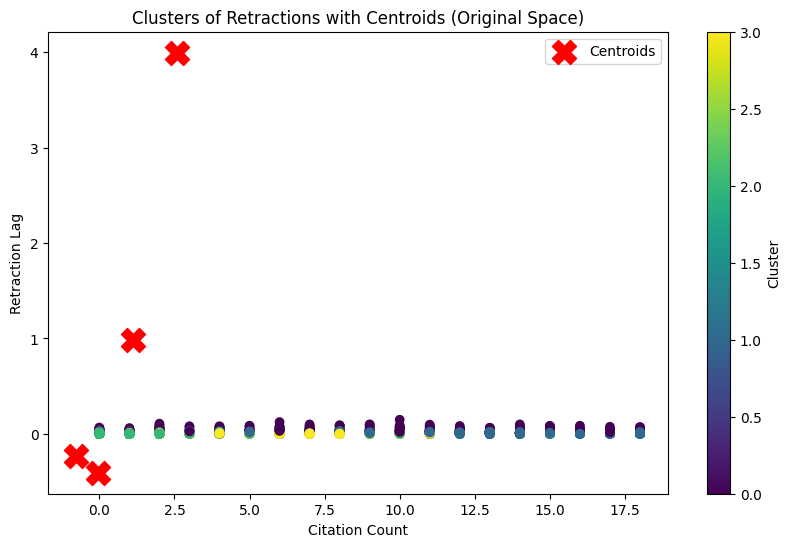

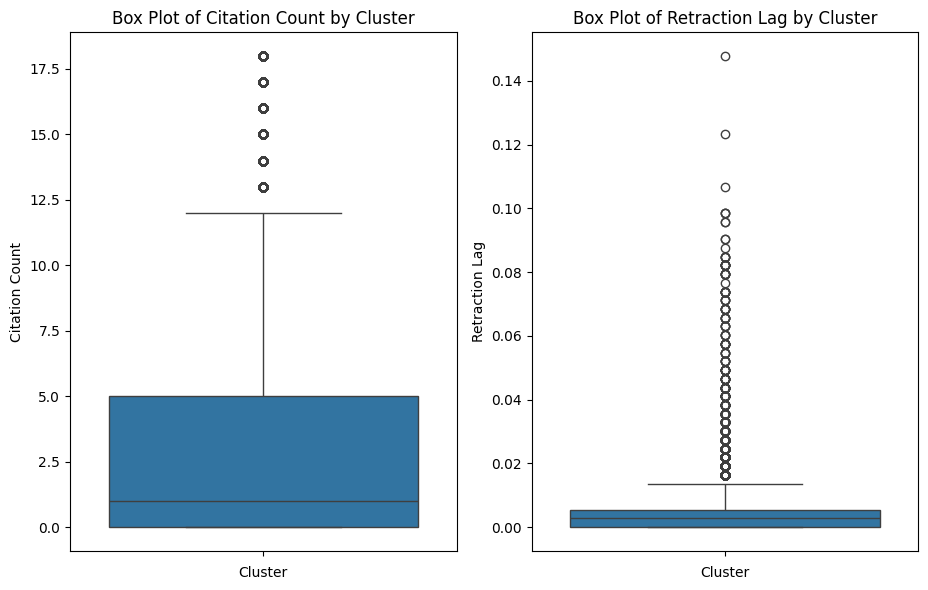

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'retractions' DataFrame is already loaded
retractions
# Filter data
retractions_filtered = retractions[(retractions['CitationCount'] <= 18) & (retractions['Retraction_Lag'] <= 10)]

if len(retractions_filtered) > 0:
    # Select relevant features for clustering
    features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

    # Encode categorical features
    le = LabelEncoder()
    retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(retractions_filtered[features])

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_scaled)

    # Number of clusters
    n_clusters = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    retractions_filtered['Cluster'] = kmeans.fit_predict(X_pca)
    label = kmeans.labels_

    # Print the silhouette score for the chosen number of clusters
    print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X_pca, label)}")

    # Plot the clusters and centroids
    plt.figure(figsize=(10, 6))
    centroids_original_space = pca.inverse_transform(kmeans.cluster_centers_)

    # Plot the clusters and centroids in the original feature space
    scatter = plt.scatter(retractions_filtered['CitationCount'], retractions_filtered['Retraction_Lag'], c=retractions_filtered['Cluster'], cmap='viridis', marker='o')
    plt.scatter(centroids_original_space[:, 0], centroids_original_space[:, 1], s=300, c='red', label='Centroids', marker='X')
    plt.title('Clusters of Retractions with Centroids (Original Space)')
    plt.xlabel('Citation Count')
    plt.ylabel('Retraction Lag')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.show()

    # Create box plots for each feature grouped by clusters
    plt.figure(figsize=(14, 6))

    # Box plot for CitationCount
    plt.subplot(1, 3, 1)
    sns.boxplot( y='CitationCount', data=retractions_filtered)
    plt.title('Box Plot of Citation Count by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Citation Count')

    # Box plot for Retraction Lag
    plt.subplot(1, 3, 2)
    sns.boxplot( y='Retraction_Lag', data=retractions_filtered)
    plt.title('Box Plot of Retraction Lag by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Retraction Lag')

    plt.tight_layout()
    plt.show()
else:
    print("No data points left after filtering.")




WITH PCA AND STANDARDIZATION
**bold text**


<ipython-input-73-f4932dfaf2cb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-73-f4932dfaf2cb>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['C

Silhouette score for 4 clusters = 0.6339924683469295
Inertia: 10101.19983656691


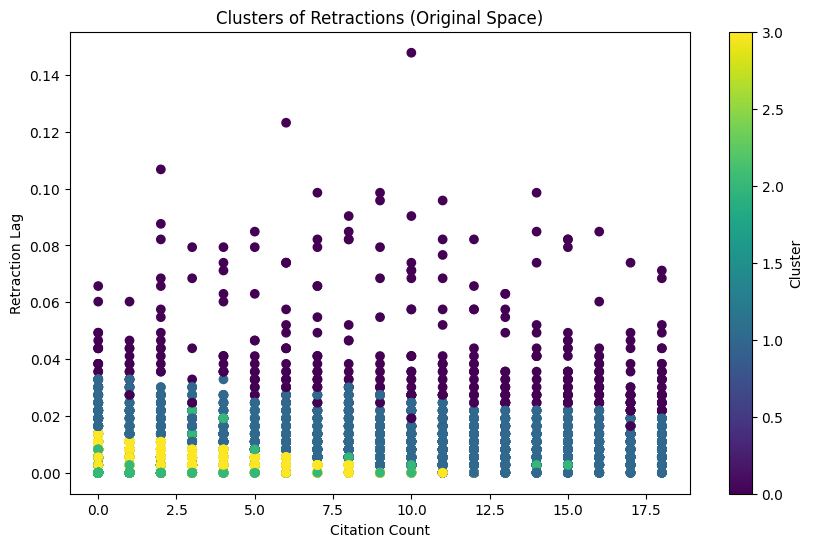

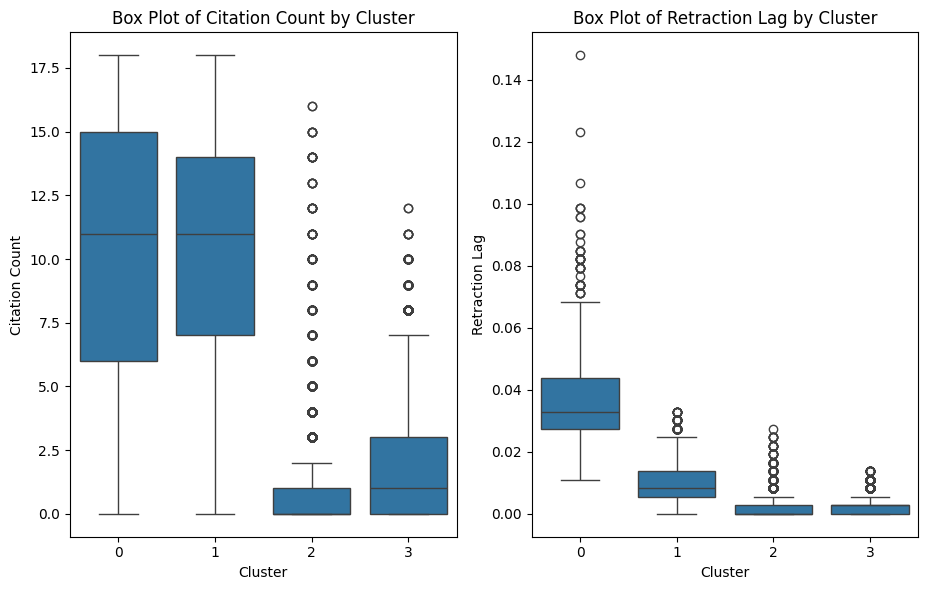

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'retractions' DataFrame is already loaded
retractions
# Filter data
retractions_filtered = retractions[(retractions['CitationCount'] <= 18) & (retractions['Retraction_Lag'] <= 10)]

if len(retractions_filtered) > 0:
    # Select relevant features for clustering
    features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

    # Encode categorical features
    le = LabelEncoder()
    retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(retractions_filtered[features])

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_scaled)

    # Number of clusters
    n_clusters = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    retractions_filtered['Cluster'] = kmeans.fit_predict(X_pca)
    label = kmeans.labels_

    # Print the silhouette score for the chosen number of clusters
    print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X_pca, label)}")
    inertia = kmeans.inertia_
    print("Inertia:", inertia)
    # Plot the clusters without centroids
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(retractions_filtered['CitationCount'], retractions_filtered['Retraction_Lag'], c=retractions_filtered['Cluster'], cmap='viridis', marker='o')
    plt.title('Clusters of Retractions (Original Space)')
    plt.xlabel('Citation Count')
    plt.ylabel('Retraction Lag')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    # Create box plots for each feature grouped by clusters
    plt.figure(figsize=(14, 6))

    # Box plot for CitationCount
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='CitationCount', data=retractions_filtered)
    plt.title('Box Plot of Citation Count by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Citation Count')

    # Box plot for Retraction Lag
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Cluster', y='Retraction_Lag', data=retractions_filtered)
    plt.title('Box Plot of Retraction Lag by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Retraction Lag')

    plt.tight_layout()
    plt.show()
else:
    print("No data points left after filtering.")


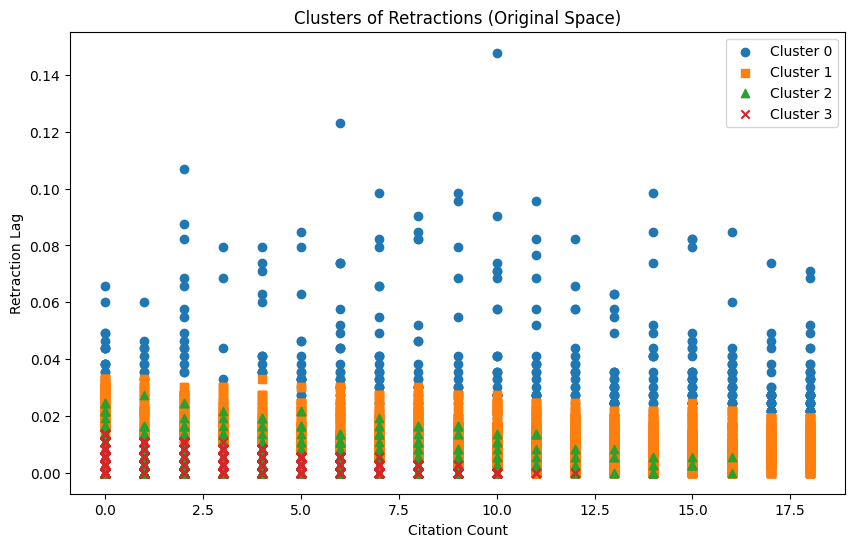

In [ ]:
# Plot the clusters with different marker shapes
plt.figure(figsize=(10, 6))
i=3
markers = ['o', 's', '^', 'x']  # Define marker shapes for each cluster
for i in range(n_clusters):
    cluster_data = retractions_filtered[retractions_filtered['Cluster'] == i]
    plt.scatter(cluster_data['CitationCount'], cluster_data['Retraction_Lag'], marker=markers[i], label=f'Cluster {i}')
plt.title('Clusters of Retractions (Original Space)')
plt.xlabel('Citation Count')
plt.ylabel('Retraction Lag')
plt.legend()
plt.show()